**Team #5**

1492809 Marcela Reyes Garza                  

1877383 Kevin Alexis Osorio Rodríguez

1896928 Jesús Ronaldo González Candelaria

1917024 Josué Abel Delgado Avila      

1896561 Israel Alejandro Martinez Martinez 



**MODULES USED**

Pandas: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy: Numpy arrays are very fast and can perform large computations in a very short time.
Matplotlib – This library is used to draw visualizations.

Sklearn: This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

OpenCV: This is an open-source library mainly focused on image processing and handling.

Tensorflow: This is an open-source library that is used for Machine Learning and Artificial intelligence and provides a range of functions to achieve complex functionalities with single lines of code.

In [130]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from keras import layers

import warnings
warnings.filterwarnings('ignore')

**DATA VISUALIZATION**

In this section, we will try to understand visualize some images which have been provided to us to build the code for each class.

In [131]:
pathTest = '../input/chest-ctscan-images/Data/test'
classesTest = os.listdir(pathTest)
classesTest

['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']

In [132]:
pathTrain = '../input/chest-ctscan-images/Data/train'
classesTrain = os.listdir(pathTrain)
classesTrain

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

In [133]:
pathValid = '../input/chest-ctscan-images/Data/valid'
classesValid = os.listdir(pathValid)
classesValid

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']


**CLASSES WE HAVE**

The bellow output may vary everytime it is run because the code has been implemented in such a way that it will show different images every time you rerun the code.

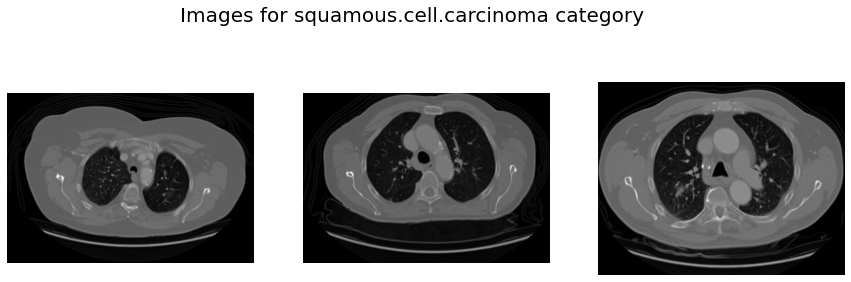

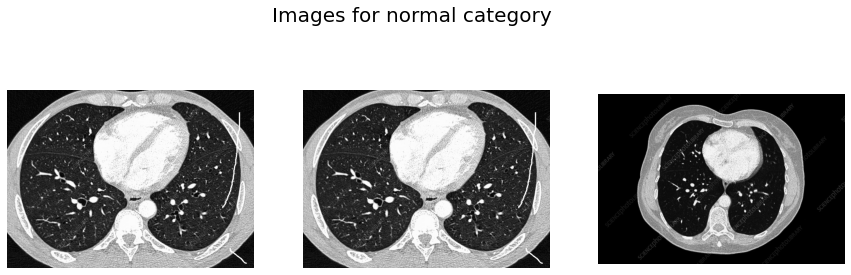

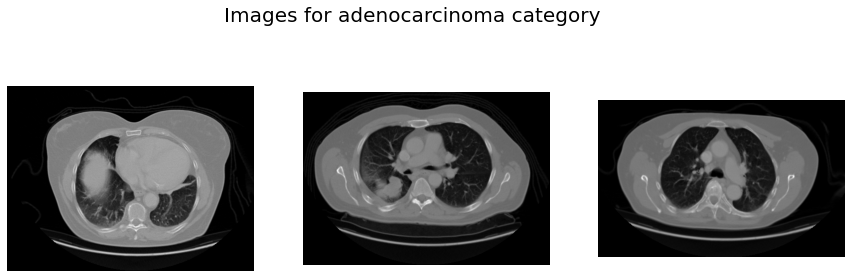

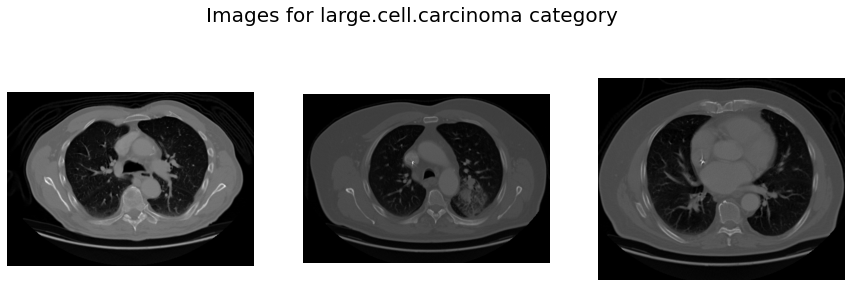

In [134]:
pathTest = '../input/chest-ctscan-images/Data/test'
 
for cat in classesTest:
    image_dir = f'{pathTest}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{pathTest}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

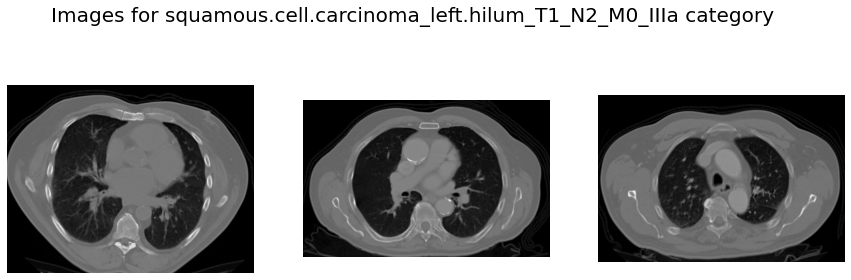

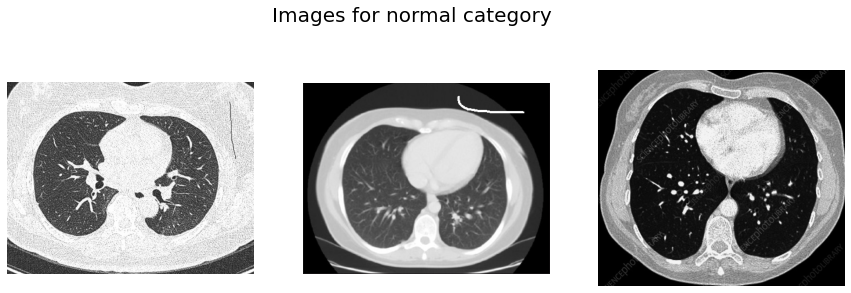

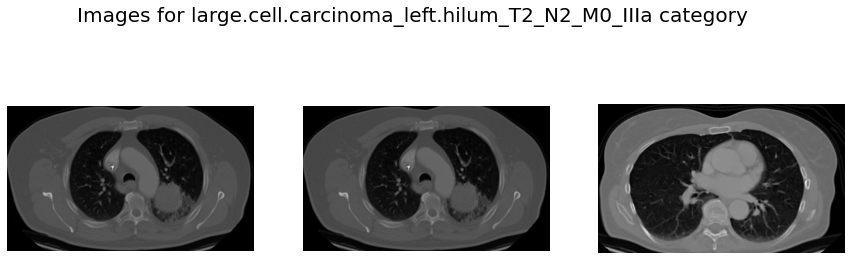

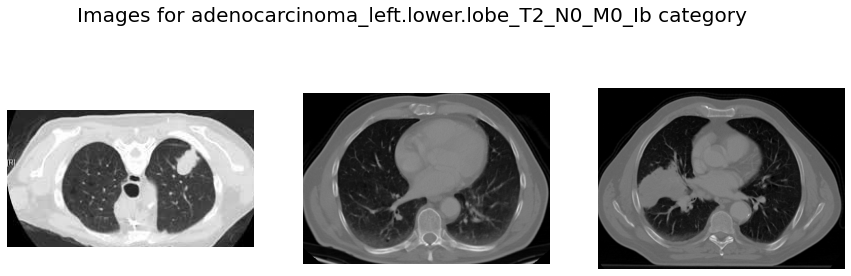

In [135]:
pathTrain = '../input/chest-ctscan-images/Data/train'
 
for cat in classesTrain:
    image_dir = f'{pathTrain}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{pathTrain}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

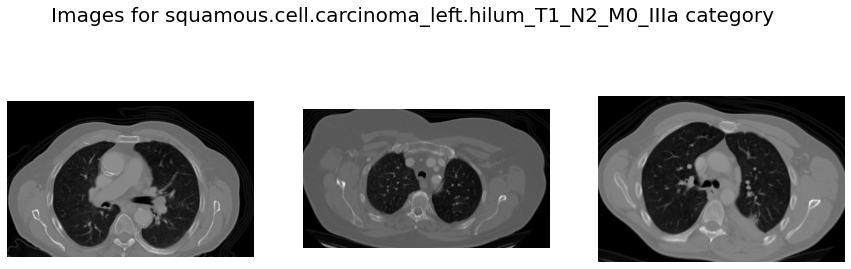

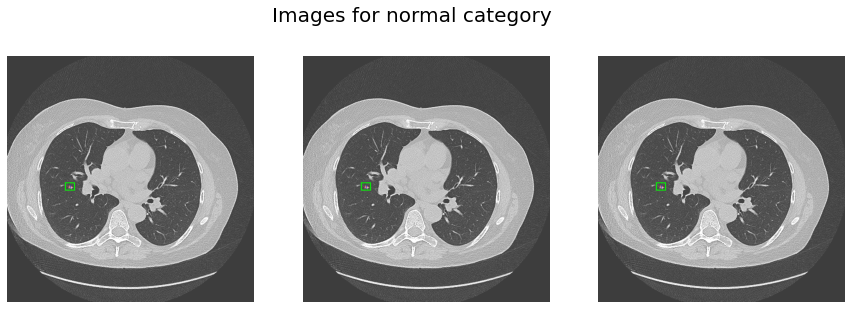

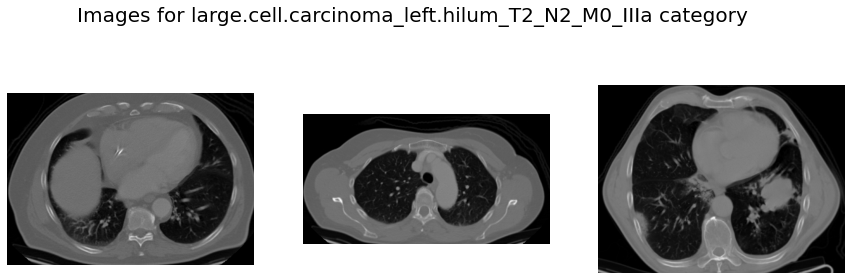

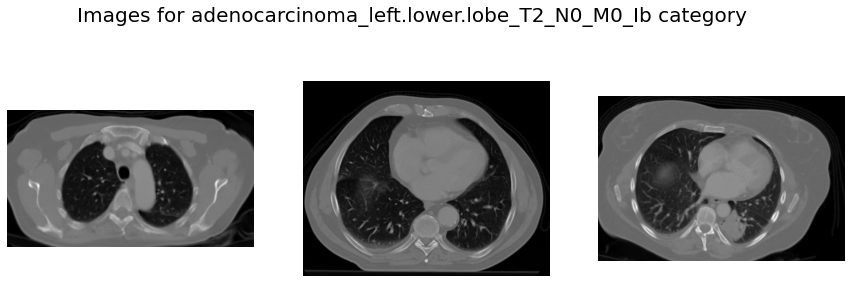

In [136]:
pathValid = '../input/chest-ctscan-images/Data/valid'
 
for cat in classesValid:
    image_dir = f'{pathValid}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{pathValid}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [137]:
pathImages = ['../input/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
'../input/chest-ctscan-images/Data/train/normal',
'../input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
'../input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

def load_images(pathImages = pathImages, n=36):
    # Load the images from disk.
    images = []
    for i in range(len(pathImages)):
        images_ = [cv2.imread(pathImages[i]+'/'+path) for path in os.listdir(pathImages[i])[:int(n/4)]]
        images.append(images_)
    # Convert to a numpy array and return it.
    sample = np.asarray(images)
    return sample

****CREATE A FUNCTION TO SHOW EXAMPLE TRAINING IMAGES****

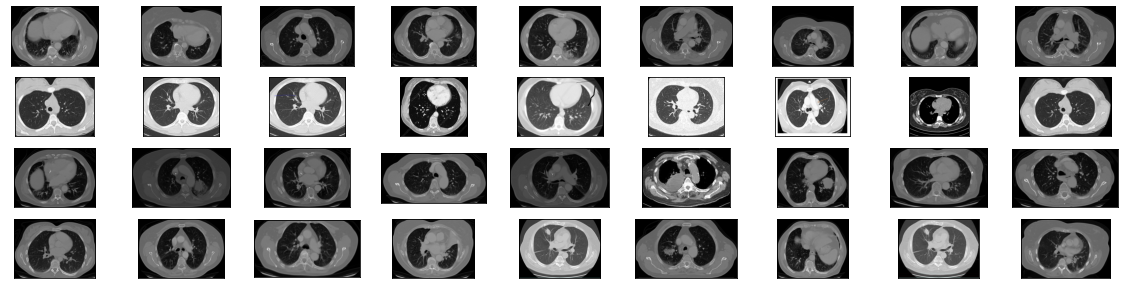

In [138]:
sample = load_images()
fig = plt.figure(figsize=(20,5))
l = 1
shapes = []
for i in range(sample.shape[0]):
    for m in range(sample.shape[1]):
        ax = fig.add_subplot(4,9,m+l,xticks = [], yticks = [])
        ax.imshow(np.squeeze(sample[i,m]))
        shapes.append(sample[i,m].shape)
    l +=9

**IMAGE PREPROCESSING**

We should ensure that all images have a similar scale, otherwise, it will take much longer to converge.

In [139]:
#Preprocess to give the image the same scale
image_shape = (256,256,3)
N_CLASSES = 4
BATCH_SIZE = 1000

train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(pathTrain,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (256,256),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(pathValid,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (256,256),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(pathTest,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (256,256),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


**MODEL ARCHITECTURE**

We will implement a Sequential model which will contain the following parts:

* Three Convolutional Layers followed by MaxPooling Layers.
* The Flatten layer to flatten the output of the convolutional layer.
* Then we will have two fully connected layers followed by the output of the flattened layer.
* We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
* The final layer is the output layer which outputs soft probabilities for the three classes. 

In [140]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32, #64
                  kernel_size=(5, 5),
                  activation='relu',
                  input_shape=(256,
                               256,
                               3),
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Conv2D(filters=64, #128
                  kernel_size=(3, 3), #///////////
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Conv2D(filters=128,#64
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
 
    layers.Flatten(),
    layers.Dense(256, activation='relu'), #64
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'), #128
    layers.Dropout(0.3),#0.3
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')
])

**SUMMARY OF THE MODEL'S ARCHITECTURE**

we can see the change in the shape of the input image after passing through different layers. The CNN model we have developed contains about 83.3 Million parameters. This number of parameters and complexity of the model is what helps to achieve a high-performance model which is being used in real-life applications.

In [141]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)           

**CHANGES IN THE SHAPE OF THE INPUT IMAGE**

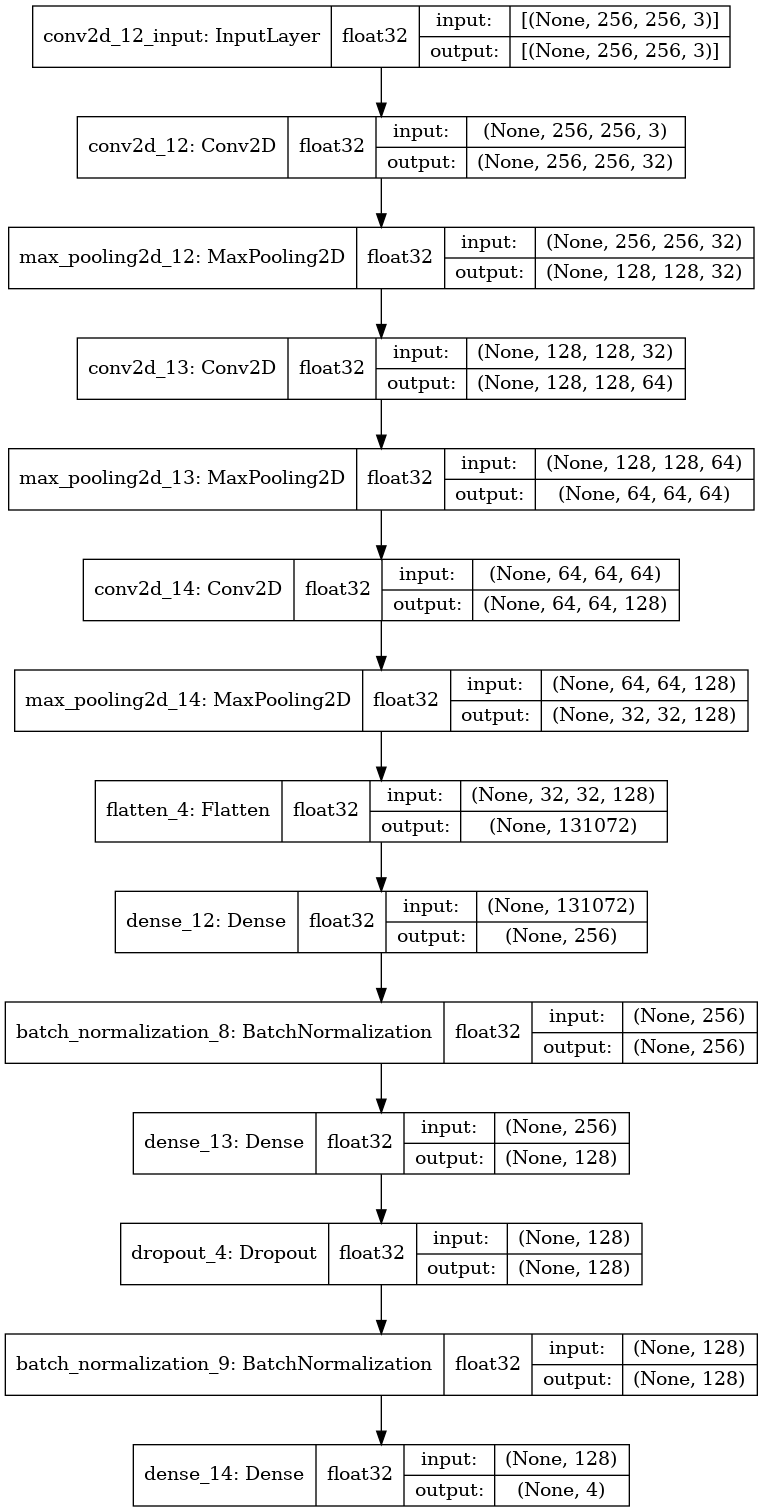

In [142]:

tf.keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    #show_layer_activations = True
)

**COMPILING**

While compiling a model we provide these three essential parameters:

* Optimizer: This is the method that helps to optimize the cost function by using gradient descent.
* Loss: The loss function by which we monitor whether the model is improving with training or not.
* Metrics: This helps to evaluate the model by predicting the training and the validation data.

In [143]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    #optimizer = tf.keras.optimizers.Adam(0.1),
    #loss = 'mean_squared_error',
    #metrics = ['accuracy']
)

**TRAIN, VALIDATION AND TEST OF DATAFRAME**

In [144]:
def define_paths(dir):
    filepaths = []
    labels = []
    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
    return filepaths, labels

def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

def create_df(tr_dir, val_dir, ts_dir):
    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)
    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

In [145]:
def create_gens(train_df, valid_df, test_df, batch_size):
    img_size = (256, 256)
    channels = 3
    img_shape = (img_size[0], img_size[1], channels)
    ts_length = len(test_df)
    test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size
    def scalar(img):
        return img
    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)
    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)
    return train_gen, valid_gen, test_gen

In [146]:
train_dir = '../input/chest-ctscan-images/Data/train'
test_dir = '../input/chest-ctscan-images/Data/valid'
valid_dir = '../input/chest-ctscan-images/Data/test'
train_df, valid_df, test_df = create_df(train_dir, valid_dir, test_dir)

train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, 74)

Found 613 validated image filenames belonging to 4 classes.
Found 315 validated image filenames belonging to 4 classes.
Found 72 validated image filenames belonging to 4 classes.


In [147]:
history = model.fit(x= train_gen,
                    validation_data= valid_gen,
                    batch_size = 150,
                    epochs = 60,
                    verbose = 1,
                   )

Epoch 1/60
9/9 [==============================] - 43s 5s/step - loss: 1.2246 - accuracy: 0.4943 - val_loss: 29.7712 - val_accuracy: 0.1714
Epoch 2/60
9/9 [==============================] - 40s 4s/step - loss: 0.8275 - accuracy: 0.6476 - val_loss: 20.5316 - val_accuracy: 0.1714
Epoch 3/60
9/9 [==============================] - 41s 5s/step - loss: 0.6513 - accuracy: 0.7586 - val_loss: 12.2334 - val_accuracy: 0.1714
Epoch 4/60
9/9 [==============================] - 40s 4s/step - loss: 0.4784 - accuracy: 0.8124 - val_loss: 7.7481 - val_accuracy: 0.1714
Epoch 5/60
9/9 [==============================] - 40s 4s/step - loss: 0.4181 - accuracy: 0.8483 - val_loss: 5.7453 - val_accuracy: 0.1746
Epoch 6/60
9/9 [==============================] - 40s 5s/step - loss: 0.3077 - accuracy: 0.8858 - val_loss: 3.6450 - val_accuracy: 0.1873
Epoch 7/60
9/9 [==============================] - 41s 4s/step - loss: 0.2516 - accuracy: 0.9201 - val_loss: 3.2855 - val_accuracy: 0.2222
Epoch 8/60
9/9 [===============

With the information above we can noticed our acc metric increases, while your val_acc metric decreases. This means that our model is fitting the training set better, but is losing its ability to predict on new data, indicating that our model is starting to fit on noise and is beginning to overfit.

**VISUALIZATION OF TRAINING AND VALIDATION ACCURACY WITH EACH EPOCH**

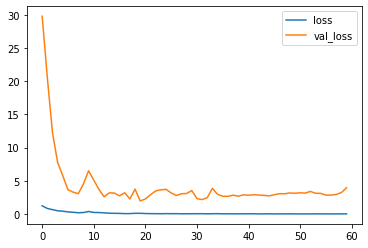

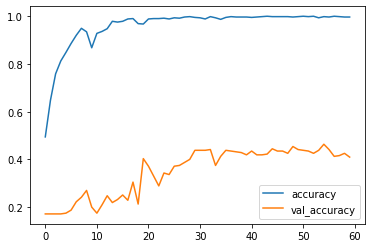

In [148]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

**MODEL EVALUATION**

For this purpose, we will first predict the class for the validation data using this model and then compare the output with the true labels.

In [149]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[3 3 1 0 3 3 3 0 3 1 3 3 3 3 3 2 2 2 2 2 2 2 2 1 1 2 2 2 1 3 1 1 1 1 1 1 1
 1 1 1 0 1 1 3 1 1 3 1 1 0 0 0 0 0 0 1 0 3 1 1 1 0 3 1 1 1 1 1 1 0 3 0]


**CONFUSION METRICS**

In [150]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['adenocarcinoma', 'large-cell-carcinoma', 'normal', 'squamous-cell-carcinoma']

**CLASSIFICATION REPORT FOR THE VALIDATION DATA**

In [151]:
print(classification_report(test_gen.classes, y_pred, target_names= target_names))

                         precision    recall  f1-score   support

         adenocarcinoma       0.77      0.43      0.56        23
   large-cell-carcinoma       0.55      0.81      0.65        21
                 normal       1.00      0.85      0.92        13
squamous-cell-carcinoma       0.65      0.73      0.69        15

               accuracy                           0.68        72
              macro avg       0.74      0.71      0.70        72
           weighted avg       0.72      0.68      0.68        72



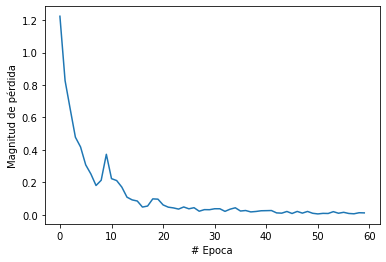

In [152]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

**PREDICTION #1**

[[2.6521082e-03 9.8761123e-01 7.9723127e-04 8.9393575e-03]]
THE UPLOADED IMAGE IS SUSPECTED AS: large cell carcinoma


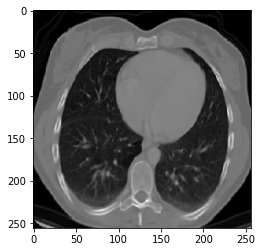

In [153]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000108 (7).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  

**PREDICTION #2**

[[1.27838196e-09 9.99454677e-01 1.11781694e-04 4.33612178e-04]]
THE UPLOADED IMAGE IS SUSPECTED AS: large cell carcinoma


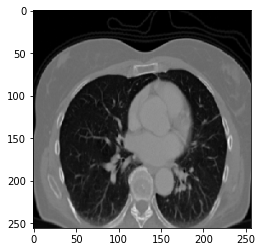

In [154]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000111 (2).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  


**PREDICTION #3**

[[0.7697444  0.05239596 0.00435985 0.17349984]]
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


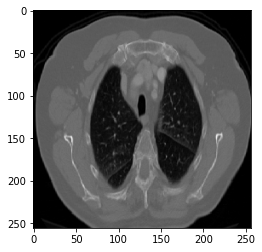

In [155]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000115 (5).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op)) 

**PREDICTION #4**

[[0.01425781 0.13299388 0.01280201 0.8399463 ]]
THE UPLOADED IMAGE IS SUSPECTED AS: squamous cell carcinoma


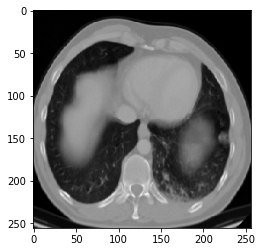

In [156]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op)) 

**PREDICTION #5**

[[9.8392063e-01 6.5428391e-03 5.7376770e-04 8.9627709e-03]]
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


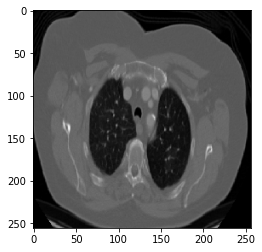

In [157]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (5).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

**PREDICTION #6**

[[3.4040986e-05 1.6075347e-03 9.9830341e-01 5.4977707e-05]]
THE UPLOADED IMAGE IS SUSPECTED AS: normal (void of cancer)


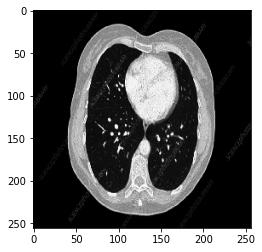

In [158]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/normal/6 - Copy (3).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

**PREDICTION #7**

[[0.39902484 0.5904694  0.00288703 0.00761873]]
THE UPLOADED IMAGE IS SUSPECTED AS: large cell carcinoma


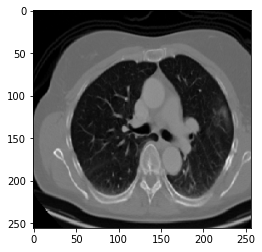

In [159]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000131.png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

**PREDICTION #8**

[[0.00133979 0.9953284  0.00123457 0.00209713]]
THE UPLOADED IMAGE IS SUSPECTED AS: large cell carcinoma


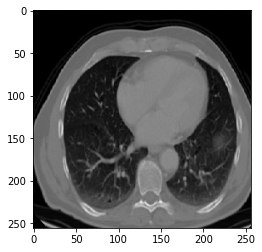

In [160]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000112 (9).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

**PREDICTION #9**

[[5.8173428e-06 5.2162615e-04 3.0584752e-06 9.9946946e-01]]
THE UPLOADED IMAGE IS SUSPECTED AS: squamous cell carcinoma


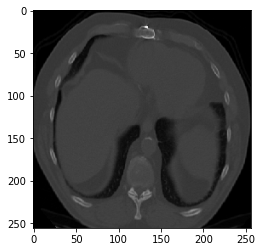

In [161]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (4).png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

**PREDICTION #10**

[[1.04048777e-04 1.00707505e-02 9.89752889e-01 7.23500125e-05]]
THE UPLOADED IMAGE IS SUSPECTED AS: normal (void of cancer)


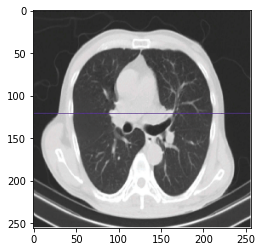

In [162]:
from keras.preprocessing import image
img = image.load_img('../input/chest-ctscan-images/Data/valid/normal/5.png',target_size=(256,256))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))